In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda,GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import numpy as np
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from google.colab import drive

xscale = 64/640
yscale = 64/480
X_train = np.load('/content/drive/My Drive/Updated_Data/Train_Processed_64.npy')
Y_train = np.load('/content/drive/My Drive/Updated_Data/Y_train.npy')
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)
print(Y_train.shape)
Y_train_new = []
for i in range(0,Y_train.shape[0]):
    Y_train_new.append(Y_train[i][0])
Y_train_new = np.asarray(Y_train_new)
print(Y_train_new.shape)
print(Y_train_new.shape[0])
for i in range(0,Y_train_new.shape[0]):
    Y_train_new[i][0] = Y_train_new[i][0] * xscale
    Y_train_new[i][1] = Y_train_new[i][1] * xscale
    Y_train_new[i][2] = Y_train_new[i][2] * yscale
    Y_train_new[i][3] = Y_train_new[i][3] * yscale
X_train = X_train/255

(14000, 64, 64, 1)
(14000, 1, 4)
(14000, 4)
14000


In [0]:
input_1 = Input(shape = (64,64,1))
# Block 1
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(input_1)
'''x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)'''
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1')(x)
'''
x = layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2')(x)'''
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
'''
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)'''
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1')(x)
'''
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3')(x)'''
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

'''# Block 5
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1')(x)

x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)'''
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4,kernel_initializer='normal')(x)
model = Model(inputs=input_1, outputs=predictions)


In [22]:
model.summary()
rms = optimizers.RMSprop(lr=0.0001, rho=0.9)
model.compile(loss='mean_squared_error', optimizer=rms,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        640       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)       295168    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 8, 8, 256)         0         
__________

In [23]:
#estimator = KerasRegressor(build_fn=model, epochs=10, batch_size=5, verbose=0)
#estimator.fit(X_train,Y_train_new)
history=model.fit(X_train,Y_train_new, validation_split = 0.2 , batch_size = 8, epochs =20,verbose = 1)

Train on 11200 samples, validate on 2800 samples
Epoch 1/20
11200/11200 [==============================] - 24s 2ms/step - loss: 78.9512 - acc: 0.5109 - val_loss: 59.9161 - val_acc: 0.5504
Epoch 2/20
11200/11200 [==============================] - 24s 2ms/step - loss: 51.4303 - acc: 0.6275 - val_loss: 54.8895 - val_acc: 0.7957
Epoch 3/20
11200/11200 [==============================] - 24s 2ms/step - loss: 31.8540 - acc: 0.8204 - val_loss: 24.7065 - val_acc: 0.8486
Epoch 4/20
11200/11200 [==============================] - 24s 2ms/step - loss: 25.4316 - acc: 0.8496 - val_loss: 22.1041 - val_acc: 0.8629
Epoch 5/20
11200/11200 [==============================] - 24s 2ms/step - loss: 23.4791 - acc: 0.8607 - val_loss: 20.4637 - val_acc: 0.8425
Epoch 6/20
11200/11200 [==============================] - 24s 2ms/step - loss: 21.9794 - acc: 0.8636 - val_loss: 24.9060 - val_acc: 0.8782
Epoch 7/20
11200/11200 [==============================] - 24s 2ms/step - loss: 20.6937 - acc: 0.8678 - val_loss: 21.8

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


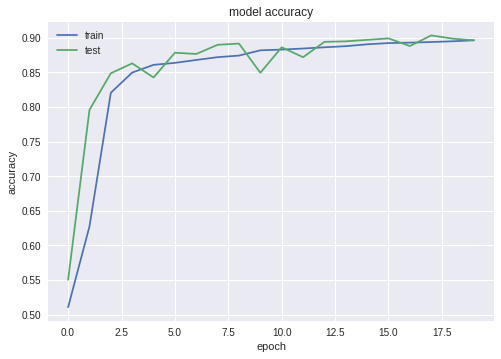

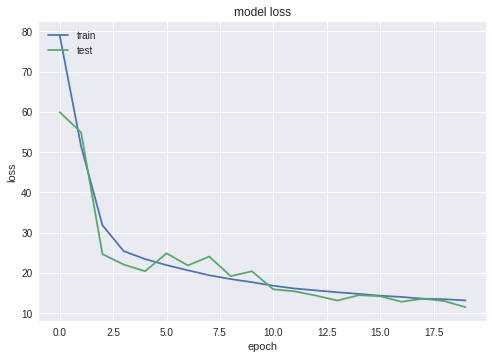

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
X_test = np.load('/content/drive/My Drive/Updated_Data/Test_Processed_64.npy')
X_test = X_test/255

In [52]:
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
model.save_weights('custom2_2_weights.h5')


(12815, 64, 64)


In [0]:
Y_predicted = model.predict(X_test)

In [54]:
print(Y_predicted.shape)
for i in range(0,Y_predicted.shape[0]):
    Y_predicted[i][0] = Y_predicted[i][0] / xscale
    Y_predicted[i][1] = Y_predicted[i][1] / xscale
    Y_predicted[i][2] = Y_predicted[i][2] / yscale
    Y_predicted[i][3] = Y_predicted[i][3] / yscale

(12815, 4)


In [55]:
X_label = np.load('/content/drive/My Drive/Updated_Data/X_test.npy')
X_label = X_label.reshape(X_label.shape[0],1)
print(X_label.shape)
for i in range(0,X_label.shape[0]):
  X_label[i] = X_label[i][0].split('/')[2]

print(X_label.shape)
print(X_label)
DF = np.concatenate((X_label, Y_predicted), axis=1)
print(DF.shape)
print(DF)
type(DF[0][2])

(12815, 1)
(12815, 1)
[['JPEG_20161129_130901_1000335000914.png']
 ['JPEG_20161209_201456_100034997460.png']
 ['14751585951781.png']
 ...
 ['JPEG_20160630_165248_1000513257867.png']
 ['1467548589518Odomos-Oil-Pack.png']
 ['1480334022239_R2A3610.png']]
(12815, 5)
[['JPEG_20161129_130901_1000335000914.png' '110.78877' '576.35315'
  '121.83712' '338.24866']
 ['JPEG_20161209_201456_100034997460.png' '126.69705' '474.36646'
  '73.20204' '424.80182']
 ['14751585951781.png' '163.97833' '563.648' '61.57013' '384.48975']
 ...
 ['JPEG_20160630_165248_1000513257867.png' '210.54893' '427.9873'
  '101.53044' '336.79007']
 ['1467548589518Odomos-Oil-Pack.png' '28.852009' '632.19934' '-4.40743'
  '475.61823']
 ['1480334022239_R2A3610.png' '150.17564' '455.4805' '67.46102'
  '328.36667']]


numpy.str_

In [0]:
import pandas as pd
out = pd.DataFrame({'image_name':DF[:,0],'x1':DF[:,1],'x2':DF[:,2],'y1':DF[:,3],'y2':DF[:,4]})

In [57]:
print(out.shape)
out.to_csv('predictions.csv')

(12815, 5)


In [58]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'predictions.csv'})
uploaded.SetContentFile('predictions.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1drVPxySE1dfXiBeYJCVdIScDZ7DRhBzI


In [49]:
!ls


adc.json  custom2_2_weights.h5	drive  predictions.csv	sample_data


In [50]:
uploaded = drive.CreateFile({'title': 'custom2_2_weights.h5'})
uploaded.SetContentFile('custom2_2_weights.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1WASMezxve0OfczQQ_mu9E64Pa7EdzsBq
